# <font style="color:rgb(50,120,229)">Morphological Operations</font>

We have already discussed about morphological operations like Erosion and Dilation in the previous video. Let's recap.

**Dilation** is used to merge or expand white regions which may be close to each other and 

**Erosion** is used to separate or shrink white regions

In this section, we will discuss how to use dilate and erode operations available in OpenCV and in the next section, we will see what is going on under the hood of these operations and how to implement them on your own. You will also be asked to implement one version of these algorithms as a Homework.

# <font style="color:rgb(50,120,229)">Dilation and Erosion in OpenCV</font>

Dilation and Erosion  operations are achieved by using  [**`dilate`**](https://docs.opencv.org/4.1.0/d4/d86/group__imgproc__filter.html#ga4ff0f3318642c4f469d0e11f242f3b6c) and [**`erode`**](https://docs.opencv.org/4.1.0/d4/d86/group__imgproc__filter.html#gaeb1e0c1033e3f6b891a25d0511362aeb) functions of OpenCV. Given below are the function descriptions.

## <font style="color:rgb(50,120,229)">Dilation</font>

### <font style="color:rgb(8,133,37)">Function Syntax</font>

```python
dst	=	cv.dilate(	src, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]]	)
```


## <font style="color:rgb(50,120,229)">Erosion</font>

### <font style="color:rgb(8,133,37)">Function Syntax</font>

```python
dst	=	cv.erode(	src, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]]	)
```

**Parameters**

Both functions take the same set of arguments

- **`src`**	input image; the number of channels can be arbitrary, but the depth should be one of CV_8U, CV_16U, CV_16S, CV_32F or CV_64F.
- **`dst`**	output image of the same size and type as src.
- **`kernel`**	structuring element used for dilation; if elemenat=Mat(), a 3 x 3 rectangular structuring element is used.
- **`anchor`**	position of the anchor within the element; default value (-1, -1) means that the anchor is at the element center.
- **`iterations`**	number of times dilation is applied.
- **`borderType`**	pixel extrapolation method.
- **`borderValue`**	border value in case of a constant border

**<font style="color:rgb(255,0,0)">Note:</font>** In the functions above, the parameter ‘iterations’ is optional and if not mentioned default is taken as 1. In case, we need to run the dilate/erode function n number of times we specify  "iterations = n"  in the function parameter list.


# <font style="color:rgb(50,120,229)">Import Libraries</font>

In [1]:
import cv2
import numpy as np
DATA_PATH = './data/'
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

# <font style="color:rgb(50,120,229)">Load the image</font>

(600, 720, 3)
[0 0 0]


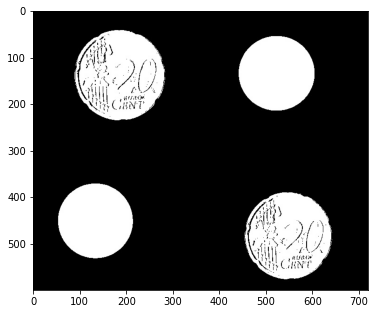

In [3]:
imageName = DATA_PATH + "images/dilation_example.jpg"

# Read the input image
image = cv2.imread(imageName)
print(image.shape)
print(image[0][0])

# Check for an invalid input
if image is None:  
    print("Could not open or find the image")
plt.imshow(image)
plt.show()

In case you are wondering, the above is a binary image of 4 coins. We can see that there are some black spots in the coins, which can be an issue if we want to create an algorithm to detect coins automatically. Thus, we want to remove those white spots so that the final image consists of only 4 white blobs.

As we have seen previously, Dilation operation can be used to grow the white region in an image. This example becomes a perfect candidate for applying dilation and get a better image for further processing.

We will use this to illustrate the dilation operation.

# <font style="color:rgb(50,120,229)">Different kernels available </font>

In [12]:
# Rectangular Kernel
MORPH_RECT = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
print(MORPH_RECT)
print()

# Elliptical Kernel
MORPH_ELLIPSE = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
print(MORPH_ELLIPSE)
print()

# Cross-shaped Kernel
MORPH_CROSS = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
print(MORPH_CROSS)
print()

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]

[[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]

[[0 0 1 0 0]
 [0 0 1 0 0]
 [1 1 1 1 1]
 [0 0 1 0 0]
 [0 0 1 0 0]]



# <font style="color:rgb(50,120,229)">Code for Dilation Operation </font>
We will check out two ways of performing dilation. 

1. Using a single big kernel
1. Using multiple iterations of a smaller kernel

## <font style="color:rgb(50,120,229)">Dilation using a single big kernel </font>

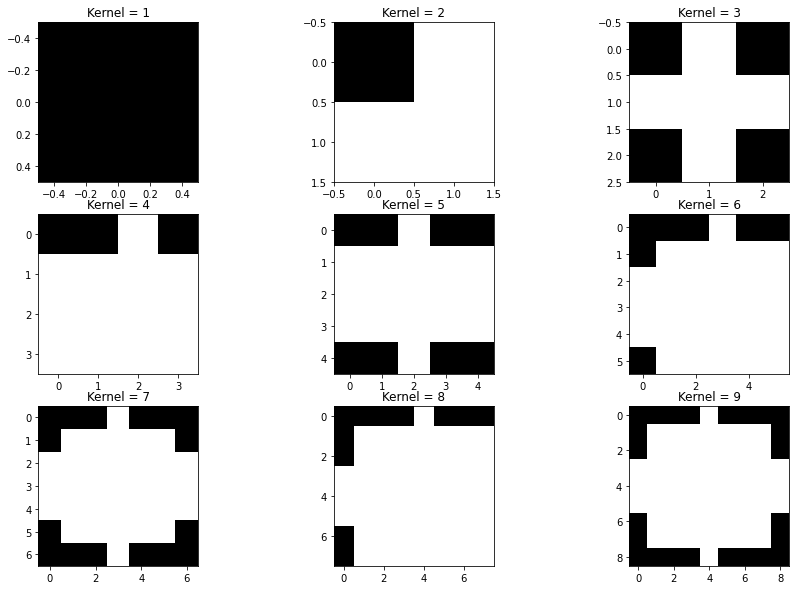

In [5]:
# Get structuring element/kernel which will be used for dilation
plt.figure(figsize=(15, 10))

for i in range(1, 10):
    
    plt.subplot(3, 3, i)
    kSize = (i, i)
    kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, kSize)
    
    plt.title('Kernel = '+str(i))
    plt.imshow(kernel1)

plt.show()

Text(0.5, 1.0, 'Dilated Image')

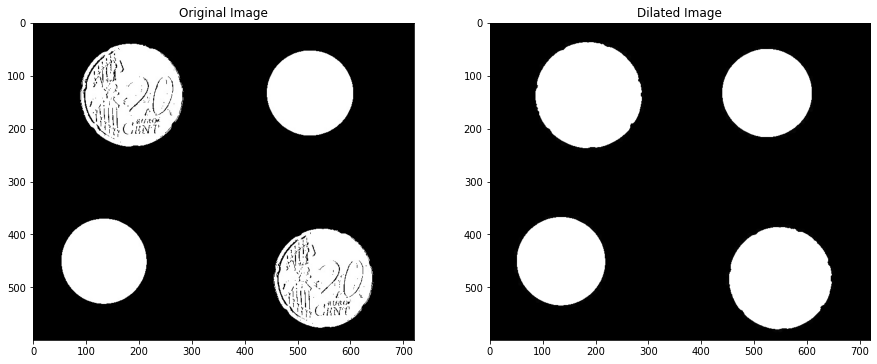

In [6]:
kSize = (7, 7)
kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, kSize)

# Apply dilate function on the input image
imageDilated = cv2.dilate(image, kernel1)

plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(image);plt.title("Original Image")
plt.subplot(122);plt.imshow(imageDilated);plt.title("Dilated Image")

## <font style="color:rgb(50,120,229)">Dilation using smaller kernel with multiple iterations </font>

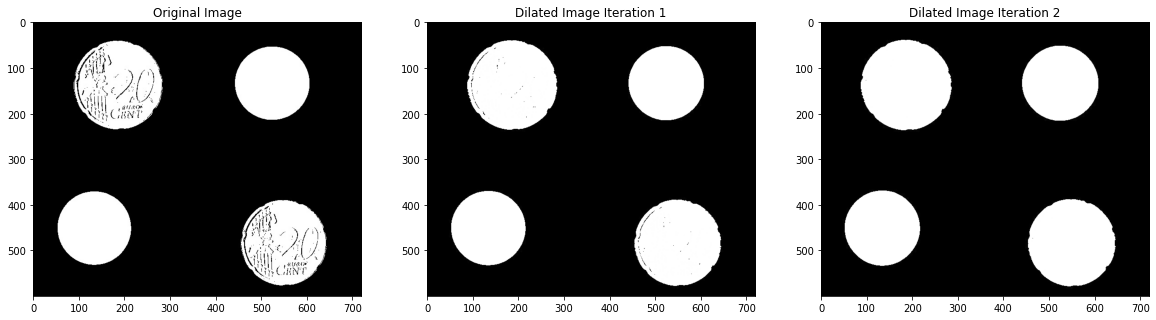

In [7]:
kSize = (3,3)
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, kSize)

# Apply dilate function on the input image
imageDilated1 = cv2.dilate(image, kernel2, iterations=1)
imageDilated2 = cv2.dilate(image, kernel2, iterations=2)

plt.figure(figsize=[20,20])
plt.subplot(131);plt.imshow(image);plt.title("Original Image")
plt.subplot(132);plt.imshow(imageDilated1);plt.title("Dilated Image Iteration 1");
plt.subplot(133);plt.imshow(imageDilated2);plt.title("Dilated Image Iteration 2");

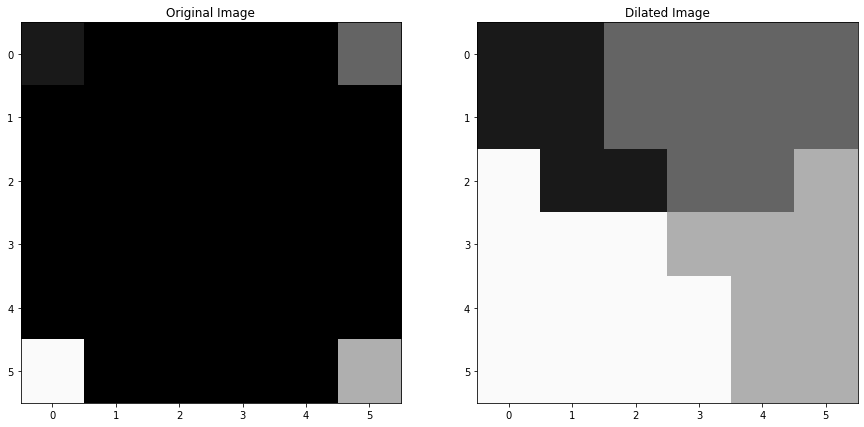

In [19]:
w = np.zeros((6, 6, 3), dtype='uint8')

w[2:4:, 2:4:] = 0
w[0][0][:] = 25
w[0][5][:] = 100
w[5][5][:] = 175
w[5][0][:] = 250

kSize = (7, 7)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, kSize)

imageDilated = cv2.dilate(w, kernel)

plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(w);plt.title("Original Image")
plt.subplot(122);plt.imshow(imageDilated);plt.title("Dilated Image")
plt.show()

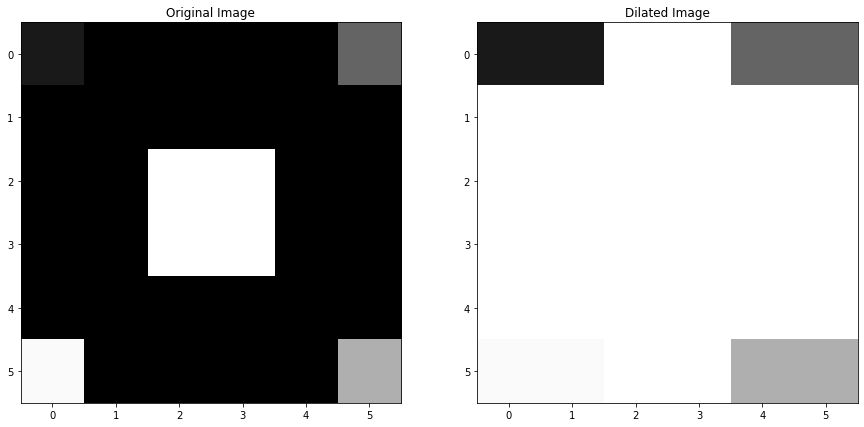

In [18]:
w = np.zeros((6, 6, 3), dtype='uint8')

w[2:4:, 2:4:] = 255
w[0][0][:] = 25
w[0][5][:] = 100
w[5][5][:] = 175
w[5][0][:] = 250

kSize = (5, 5)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, kSize)

imageDilated = cv2.dilate(w, kernel)

plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(w);plt.title("Original Image")
plt.subplot(122);plt.imshow(imageDilated);plt.title("Dilated Image")
plt.show()

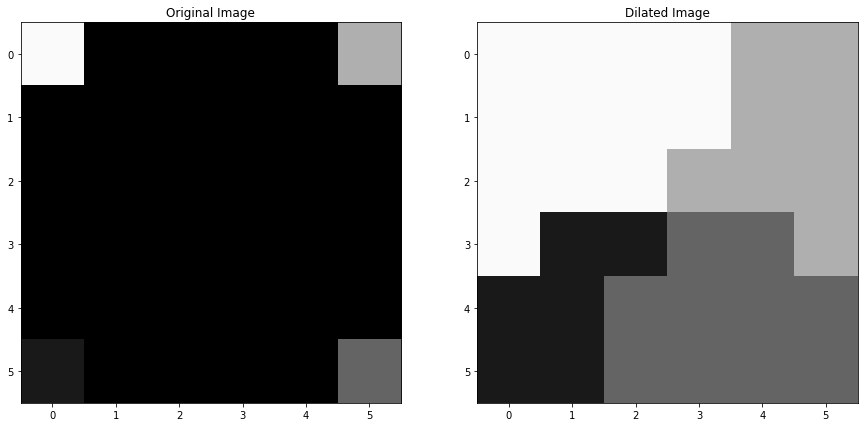

In [17]:
w = np.zeros((6, 6, 3), dtype='uint8')

w[2:4:, 2:4:] = 0
w[0][0][:] = 250
w[0][5][:] = 175
w[5][5][:] = 100
w[5][0][:] = 25

kSize = (7, 7)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, kSize)

imageDilated = cv2.dilate(w, kernel)

plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(w);plt.title("Original Image")
plt.subplot(122);plt.imshow(imageDilated);plt.title("Dilated Image")
plt.show()

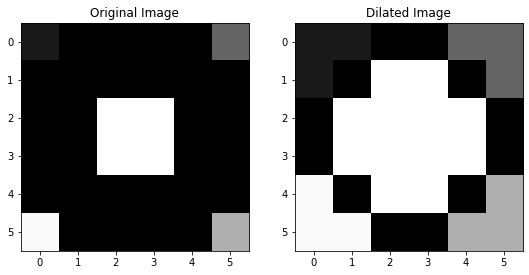

In [26]:
w = np.zeros((6, 6, 3), dtype='uint8')

w[2:4:, 2:4:] = 255
w[0][0][:] = 25
w[0][5][:] = 100
w[5][5][:] = 175
w[5][0][:] = 250

kSize = (3, 3)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, kSize)

imageDilated = cv2.dilate(w, kernel)

plt.figure(figsize=[9, 9])

plt.subplot(121);plt.imshow(w);plt.title("Original Image")
plt.subplot(122);plt.imshow(imageDilated);plt.title("Dilated Image")

plt.show()

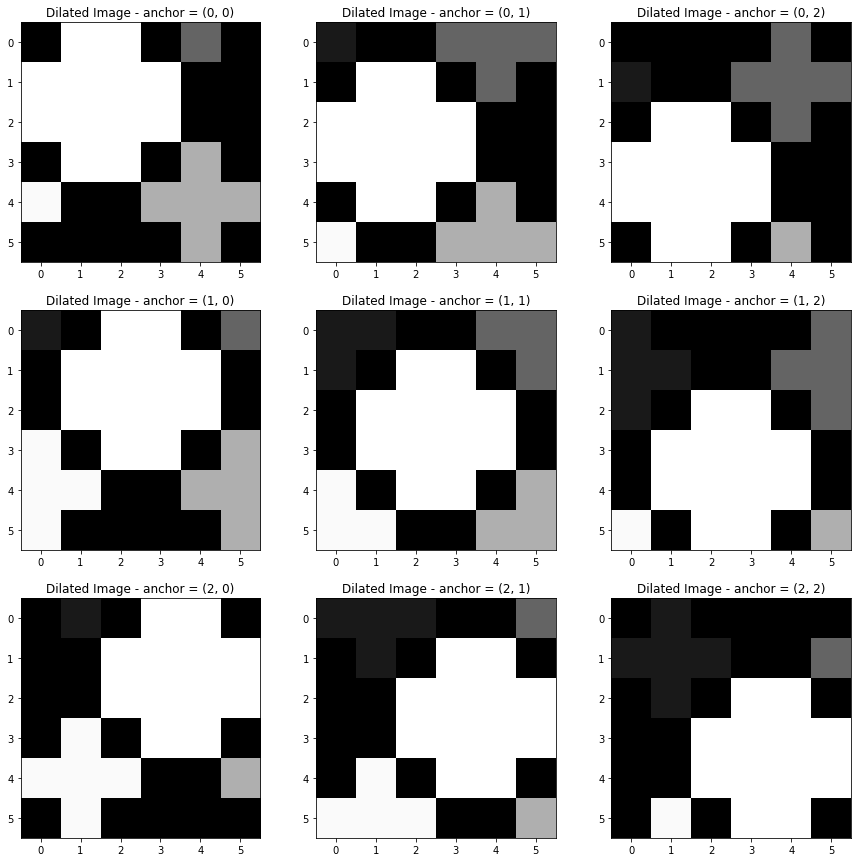

In [27]:
# Anchor means from where to start to paint the kernel when the kernel (middle) hits a color 
w = np.zeros((6, 6, 3), dtype='uint8')

w[2:4:, 2:4:] = 255
w[0][0][:] = 25
w[0][5][:] = 100
w[5][5][:] = 175
w[5][0][:] = 250

kSize = (3, 3)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, kSize)

imageDilated_0_0 = cv2.dilate(w, kernel, anchor=(0, 0))
imageDilated_0_1 = cv2.dilate(w, kernel, anchor=(0, 1))
imageDilated_0_2 = cv2.dilate(w, kernel, anchor=(0, 2))

imageDilated_1_0 = cv2.dilate(w, kernel, anchor=(1, 0))
imageDilated_1_1 = cv2.dilate(w, kernel, anchor=(1, 1))
imageDilated_1_2 = cv2.dilate(w, kernel, anchor=(1, 2))

imageDilated_2_0 = cv2.dilate(w, kernel, anchor=(2, 0))
imageDilated_2_1 = cv2.dilate(w, kernel, anchor=(2, 1))
imageDilated_2_2 = cv2.dilate(w, kernel, anchor=(2, 2))

plt.figure(figsize=[15,15])

plt.subplot(331);plt.imshow(imageDilated_0_0);plt.title("Dilated Image - anchor = (0, 0)")
plt.subplot(332);plt.imshow(imageDilated_0_1);plt.title("Dilated Image - anchor = (0, 1)")
plt.subplot(333);plt.imshow(imageDilated_0_2);plt.title("Dilated Image - anchor = (0, 2)")
plt.subplot(334);plt.imshow(imageDilated_1_0);plt.title("Dilated Image - anchor = (1, 0)")
plt.subplot(335);plt.imshow(imageDilated_1_1);plt.title("Dilated Image - anchor = (1, 1)")
plt.subplot(336);plt.imshow(imageDilated_1_2);plt.title("Dilated Image - anchor = (1, 2)")
plt.subplot(337);plt.imshow(imageDilated_2_0);plt.title("Dilated Image - anchor = (2, 0)")
plt.subplot(338);plt.imshow(imageDilated_2_1);plt.title("Dilated Image - anchor = (2, 1)")
plt.subplot(339);plt.imshow(imageDilated_2_2);plt.title("Dilated Image - anchor = (2, 2)")

plt.show()

# <font style="color:rgb(50,120,229)">Code for Erosion Operation</font>

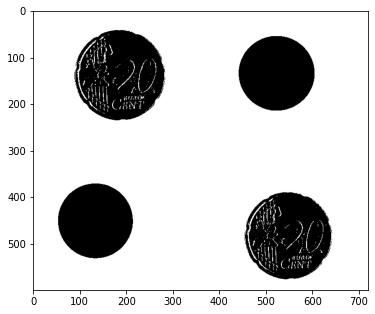

In [172]:
# Image taken as input
imageName = DATA_PATH + "images/erosion_example.jpg"
image = cv2.imread(imageName, cv2.IMREAD_COLOR)
# Check for invalid input
if image is None:
    print("Could not open or find the image")
plt.imshow(image)
plt.show()

The above image is just the inverted version of the previous image. We can see there are white spots in the 2 coins, which we want to get rid of and make the coins fully black so that further analysis becomes easy.

As we have seen previously, Erosion operation can be used to grow the black region in an image. We will use this to illustrate the erosion operation.

Similar to dilation, you can use any of the 2 methods for erosion. Given below is the code for using a single kernel. You should try to write the code for erosion using multiple iterations and see how the output varies.

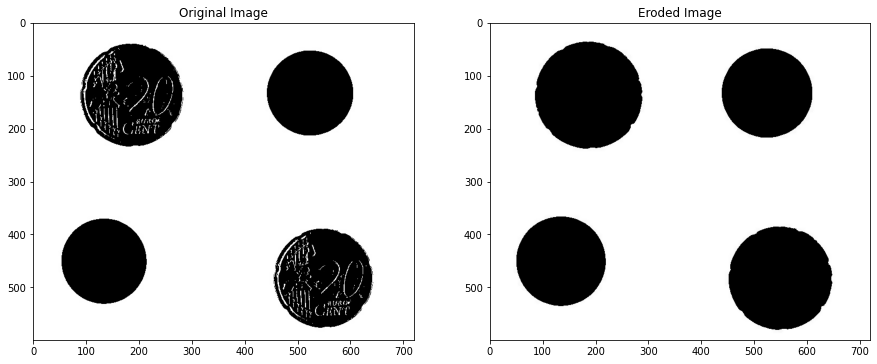

In [173]:
# Eroding the image , decreases brightness of image
imageEroded = cv2.erode(image, kernel1)

plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(image);plt.title("Original Image")
plt.subplot(122);plt.imshow(imageEroded);plt.title("Eroded Image");

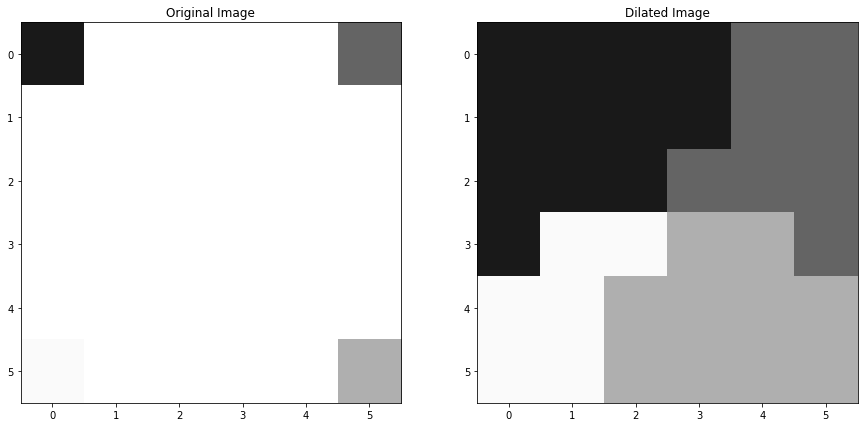

In [189]:
w = 255*np.ones((6, 6, 3), dtype='uint8')

w[2:4:, 2:4:] = 255
w[0][0][:] = 25
w[0][5][:] = 100
w[5][5][:] = 175
w[5][0][:] = 250

kSize = (7, 7)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, kSize)

imageDilated = cv2.erode(w, kernel)

plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(w);plt.title("Original Image")
plt.subplot(122);plt.imshow(imageDilated);plt.title("Dilated Image")
plt.show()

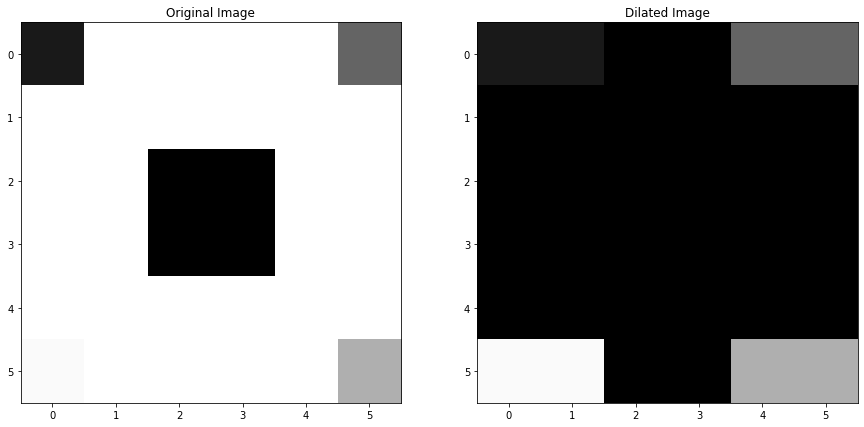

In [182]:
w = 255*np.ones((6, 6, 3), dtype='uint8')

w[2:4:, 2:4:] = 0
w[0][0][:] = 25
w[0][5][:] = 100
w[5][5][:] = 175
w[5][0][:] = 250

kSize = (5, 5)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, kSize)

imageDilated = cv2.erode(w, kernel)

plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(w);plt.title("Original Image")
plt.subplot(122);plt.imshow(imageDilated);plt.title("Dilated Image")
plt.show()

We can use various methods to detect the location of coins and perform further analysis on this image using the concepts we'll learn in the next sections.